In [41]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
from scipy.cluster.vq import whiten, kmeans2

In [43]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [44]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [47]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    if team['squadMarketValue'] == None:
        team['squadMarketValue'] = np.random.randint(100000, 500000)
    losses = 0
    for f in fixtures:
        if f['status'] == 'FINISHED':
            if team['name'] == f['homeTeamName']:
                losses += (f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam'])
            else:
                losses += (f['result']['goalsAwayTeam'] < f['result']['goalsHomeTeam'])
    print('Team "{}", Market {}, {} losses'.format(team['name'], team['squadMarketValue'], losses))
    team['losses'] = losses

Team "FC Rio Ave", Market 202621, 12 losses
Team "FC Porto", Market 291256, 5 losses
Team "Moreirense FC", Market 199781, 15 losses
Team "FC Paços de Ferreira", Market 473941, 15 losses
Team "Sporting CP", Market 173197, 6 losses
Team "Maritimo Funchal", Market 394314, 10 losses
Team "CD Tondela", Market 205982, 14 losses
Team "SL Benfica", Market 493626, 7 losses
Team "Boavista Porto FC", Market 127836, 14 losses
Team "FC Arouca", Market 286166, 0 losses
Team "Vitoria Setubal", Market 107088, 13 losses
Team "C.F. Os Belenenses", Market 295614, 12 losses
Team "Vitoria Guimaraes", Market 125113, 15 losses
Team "Sporting Braga", Market 463420, 6 losses
Team "GD Estoril Praia", Market 210823, 18 losses
Team "Feirense", Market 323702, 19 losses
Team "Nacional Funchal", Market 448785, 0 losses
Team "G.D. Chaves", Market 195764, 12 losses


In [49]:
team_for_pd = []
for team in teams:
    if team['squadMarketValue']:
        team_for_pd.append({'name': team['name'], 'squadMarketValue': team['squadMarketValue'], 'losses': team['losses']})
team_for_pd

[{'losses': 12, 'name': 'FC Rio Ave', 'squadMarketValue': 202621},
 {'losses': 5, 'name': 'FC Porto', 'squadMarketValue': 291256},
 {'losses': 15, 'name': 'Moreirense FC', 'squadMarketValue': 199781},
 {'losses': 15, 'name': 'FC Paços de Ferreira', 'squadMarketValue': 473941},
 {'losses': 6, 'name': 'Sporting CP', 'squadMarketValue': 173197},
 {'losses': 10, 'name': 'Maritimo Funchal', 'squadMarketValue': 394314},
 {'losses': 14, 'name': 'CD Tondela', 'squadMarketValue': 205982},
 {'losses': 7, 'name': 'SL Benfica', 'squadMarketValue': 493626},
 {'losses': 14, 'name': 'Boavista Porto FC', 'squadMarketValue': 127836},
 {'losses': 0, 'name': 'FC Arouca', 'squadMarketValue': 286166},
 {'losses': 13, 'name': 'Vitoria Setubal', 'squadMarketValue': 107088},
 {'losses': 12, 'name': 'C.F. Os Belenenses', 'squadMarketValue': 295614},
 {'losses': 15, 'name': 'Vitoria Guimaraes', 'squadMarketValue': 125113},
 {'losses': 6, 'name': 'Sporting Braga', 'squadMarketValue': 463420},
 {'losses': 18, 'na

In [50]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,losses,name,squadMarketValue
0,12,FC Rio Ave,202621
1,5,FC Porto,291256
2,15,Moreirense FC,199781
3,15,FC Paços de Ferreira,473941
4,6,Sporting CP,173197
5,10,Maritimo Funchal,394314
6,14,CD Tondela,205982
7,7,SL Benfica,493626
8,14,Boavista Porto FC,127836
9,0,FC Arouca,286166


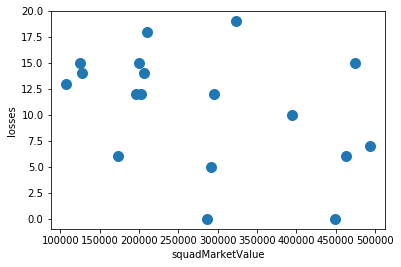

In [51]:
teams_pd.plot.scatter(x='squadMarketValue', y='losses', s=100)

In [52]:
del teams_pd['name']
teams_pd

,losses,squadMarketValue
0,12,202621
1,5,291256
2,15,199781
3,15,473941
4,6,173197
5,10,394314
6,14,205982
7,7,493626
8,14,127836
9,0,286166


In [53]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.2122742 ,  1.6275674 ],
       [ 0.92178092,  2.33953426],
       [ 2.76534275,  1.60475491],
       [ 2.76534275,  3.80696435],
       [ 1.1061371 ,  1.39121706],
       [ 1.84356183,  3.16735488],
       [ 2.58098657,  1.65456487],
       [ 1.29049328,  3.96508549],
       [ 2.58098657,  1.02685164],
       [ 0.        ,  2.29864848],
       [ 2.39663038,  0.86019188],
       [ 2.2122742 ,  2.3745402 ],
       [ 2.76534275,  1.00497895],
       [ 1.1061371 ,  3.72245368],
       [ 3.3184113 ,  1.69345055],
       [ 3.50276748,  2.60015904],
       [ 0.        ,  3.60489701],
       [ 2.2122742 ,  1.57248807]])

In [54]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 1.75138374,  3.6654646 ],
        [ 0.5069795 ,  2.4085742 ],
        [ 2.65472904,  1.60195475]]),
 array([2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2]))

In [55]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'b',
 'r',
 'g',
 'r',
 'b',
 'r',
 'b',
 'g',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'g',
 'b']

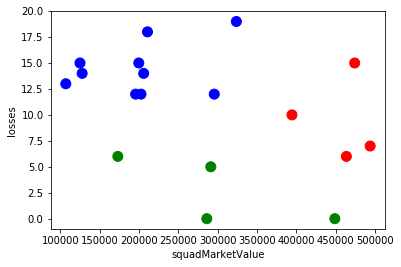

In [56]:
teams_pd.plot.scatter(x='squadMarketValue', y='losses', c=colors, s=100)

In [57]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 1.75138374,  3.6654646 ],
        [ 3.41058939,  2.14680479],
        [ 2.62707561,  1.12419434],
        [ 2.30445229,  1.80729014],
        [ 0.5069795 ,  2.4085742 ]]),
 array([3, 4, 2, 0, 4, 0, 3, 0, 2, 4, 2, 3, 2, 0, 1, 1, 4, 3]))

In [58]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'm',
 'b',
 'r',
 'm',
 'r',
 'y',
 'r',
 'b',
 'm',
 'b',
 'y',
 'b',
 'r',
 'g',
 'g',
 'm',
 'y']

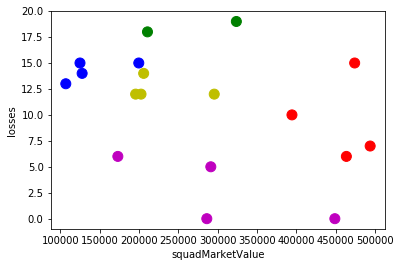

In [59]:
teams_pd.plot.scatter(x='squadMarketValue', y='losses', c=colors, s=100)